In [372]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex
import emoji
import regex

import pandas as pd
import numpy as np
import collections, functools, operator
from collections import Counter
import matplotlib.pyplot as plt

In [530]:
df = pd.read_json("C:/Users/zhuang/Documents/GitHub/twitter-hook-graphics/data/justinbieber_tweets.json")

In [531]:
def analyze_sentiment(text):
    vader_sent_dicts = []

    analyzer = SentimentIntensityAnalyzer()
    for sentence in list(text):
        vs = analyzer.polarity_scores(sentence)
        vader_sent_dicts.append(vs)
    
    sent_class = []

    for i in vader_sent_dicts:
        if i["compound"] >= 0.05:
            sent_class.append("positive")
        elif i["compound"] <= -0.05:
            sent_class.append("negative")
        else:
            sent_class.append("neutral")
            
    return Counter(sent_class)

In [516]:
def get_nrc_values(text):
    nrc_dicts = []

    for i in list(text):

        text_object = NRCLex(i)
        
        nrc_dicts.append(text_object.raw_emotion_scores)
        
    result = dict(functools.reduce(operator.add,map(collections.Counter, nrc_dicts)))
        
    del result["positive"]
    del result["negative"]
        
    return result

In [517]:
def reorder_nrc_labels(nrc_labels):
    
    neg_ordered = ["anger", "disgust", "fear", "sadness"]
    pos_ordered = ["anticipation", "joy", "surprise", "trust"]
    labels_reordered = []
    
    for i in neg_ordered:
        if i in nrc_labels:
            labels_reordered.append(i)
            
        else:
            pass
        
    for i in pos_ordered:
        if i in nrc_labels:
            labels_reordered.append(i)
            
        else:
            pass
    return labels_reordered
        
    



In [518]:
def make_pie_chart(d_sent, d_nrc):
    
    #colors - https://docs.google.com/spreadsheets/d/1eckbKkGs3Tm8q2JbMSYSR8plDkfhHwmRvQKpwralKq4/edit#gid=0
    colors1 = ['#FD6868','#FCFB8D','#4EB9FC'] #pink, blue, yellow
    
    nrc_color_dict = {
        "joy":'#3CE6CC', 
        "trust": "#9DC2F5", 
        "surprise": "#49C4E6", 
        "sadness": '#E86BCB',
        "disgust": '#FF8A69',
        "anger": '#FFA091',
        "fear": "#FF8383",
        "anticipation": "#50FFB9"
        
    }
    
    
    labels1 = ['negative', 'neutral', 'positive']
    sizes1 = [d_sent["negative"],d_sent['neutral'], d_sent["positive"]]
#     title1 = """Lebron James' Positive, 
#     Negative and Neutral Tweets"""
        
        

    labels2 = reorder_nrc_labels(d_nrc.keys())
    sizes2 = [d_nrc[i] for i in labels2]
#     title2 = "Lebron James' Tweets by Emotions"
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
    ax1.pie(sizes1, labels=labels1, autopct='%1.0f%%', textprops={"fontsize":12},colors=colors1,wedgeprops= {"edgecolor":"black",
                     'linewidth': 1,
                     'antialiased': True})
    ax1.axis('equal')  
    
    ax2.pie(sizes2, labels=labels2, autopct='%1.0f%%', textprops={"fontsize":12},colors=[nrc_color_dict[i] for i in labels2],
           wedgeprops= {"edgecolor":"black",
                     'linewidth': 1,
                     'antialiased': True})
    ax2.axis('equal') 
    
    #ax1.title.set_text(title1)
#     ax1.set_title(title1,fontweight="bold",fontsize=15)
#     ax2.set_title(title2,fontweight="bold",fontsize=15)
    
    plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
    
    plt.suptitle("Lebron James's Tweets By Emotion",fontweight="bold",fontsize=25, y=1.06)

    plt.show()
    

In [519]:
def extract_top3_emojis(text):
    emoji_list = []
    for i in list(text):
        e = [c for c in i if c in emoji.UNICODE_EMOJI['en']]
        emoji_list.extend(e)
        
    return [i[0] for i in Counter(emoji_list).most_common(3)]

In [532]:
sent = analyze_sentiment(df.full_text)
nrc = get_nrc_values(df.full_text)
e = extract_top3_emojis(df.full_text)

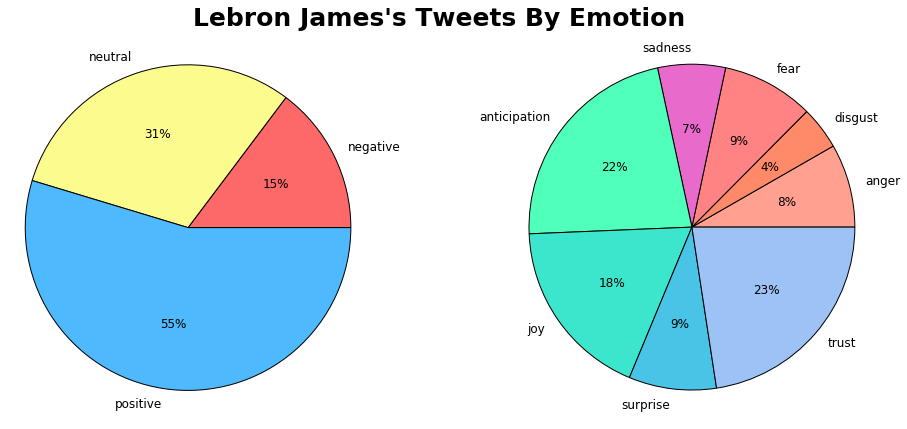

In [521]:
make_pie_chart(sent,nrc)

In [533]:
e

['👏', '📷', '🙏']